# Load libraries

In [83]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Extration

In [84]:
# Read  csv dataset 
df = pd.read_csv('Churn_prediction.csv')

In [85]:
# Show data
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [86]:
# Determine missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Transform

In [87]:
# Split dataset df in features and target
x = df.drop('Churn', axis = 1)
y = df['Churn']

In [88]:
# Split the  x  and y in part train and part test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25)

### Build pipelines 

In [89]:
# We transform categorical data in numerical data using OrdinalEncoder 
# We need next to rescale the data
# And we defined a machine learning model 

# First pipeline
pip_Standard = Pipeline([
    ('one', OrdinalEncoder()),
    ('scar', StandardScaler()),
    ('cfl', tree.DecisionTreeClassifier())])

# Secund pipeline
pip_depth_Standard = Pipeline([
    ('one', OrdinalEncoder()),
    ('scar', StandardScaler()),
    ('cfl', tree.DecisionTreeClassifier(max_depth=4)),
])

# Third pipeline
pip_depth_Max_Min = Pipeline([
    ('one', OrdinalEncoder()),
    ('min_max', MinMaxScaler()),
    ('cfl', tree.DecisionTreeClassifier(max_depth=4)),
])

# Fourth pipeline
pip_random_Max_Min = Pipeline([
    ('one', OrdinalEncoder()),
    ('min_max', MinMaxScaler()),
    ('cfl', tree.DecisionTreeClassifier(max_depth=5, random_state=3)),
])

# Loading models

In [90]:
# creating  a empty list
accuracy_list = []

In [91]:
# Find accuracy score of all pepilines models
pip_Standard.fit(x_train, y_train)
acc0 = pip_Standard.score(x_test, y_test)
accuracy_list.append(100*acc0)

pip_depth_Standard.fit(x_train, y_train)
acc1 = pip_depth_Standard.score(x_test, y_test)
accuracy_list.append(100*acc1)

pip_depth_Max_Min.fit(x_train, y_train)
acc2 = pip_depth_Max_Min.score(x_test, y_test)
accuracy_list.append(100*acc2)

pip_random_Max_Min.fit(x_train, y_train)
acc3 = pip_random_Max_Min.score(x_test, y_test)
accuracy_list.append(100*acc3)

In [72]:
print('Accuray of pip_Standadr pepiline: {} %'.format(100*acc0))
print('Accuray of pip_depth_Standard pepiline {} %'.format(100*acc1))
print('Accuray of pip_depth_Max_Min pepiline {}  %'.format(100*acc2))
print('Accuray of pip_random_Max_Min pepiline {} %'.format(100*acc3))

Accuray of pip_Standadr pepiline: 70.6984667802385 %
Accuray of pip_depth_Standadr pepiline 78.137421919364 %
Accuray of pip_depth_Max_Min pepiline 78.137421919364  %
Accuray of pip_random_Max_Min pepiline 77.11527541169791 %


In [92]:
# Creating list of pepiline models
model_list = ['pip_Standard', 'pip_depth_Standard', 'pip_depth_Max_Min', 'pip_random_Max_Min']

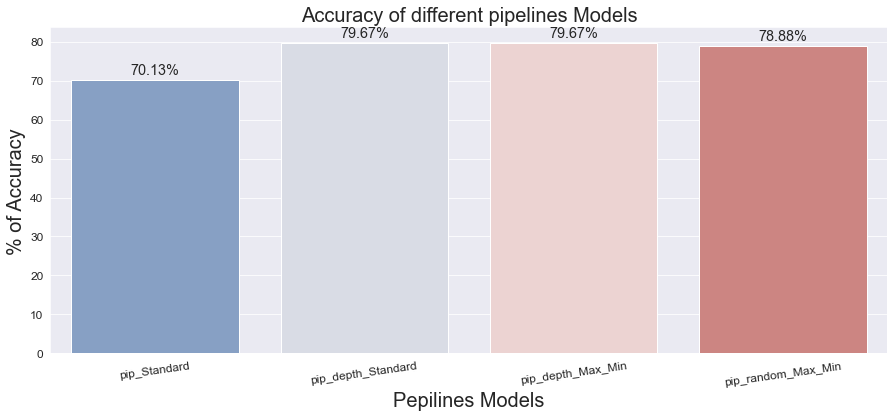

In [93]:
# Plot accuracy pipelines models
plt.rcParams['figure.figsize']=15,6
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "vlag", saturation =2.0)
plt.xlabel('Pipelines Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different pipelines Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()